In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

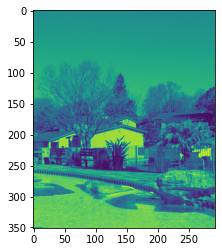

In [2]:
imgR = cv2.imread('C:/Users/ahnaf/Documents/Jupyter Notebook/image_stitching/right.jpg')
imgR2 = cv2.cvtColor(imgR, cv2.COLOR_BGR2GRAY)
plt.imshow(imgR2)
plt.show()

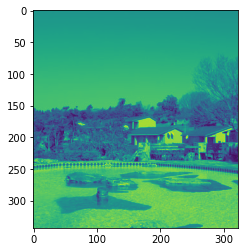

In [3]:
imgL = cv2.imread('C:/Users/ahnaf/Documents/Jupyter Notebook/image_stitching/left.jpg')
imgL2 = cv2.cvtColor(imgL, cv2.COLOR_BGR2GRAY)
plt.imshow(imgL2)
plt.show()



In [4]:
sift = cv2.SIFT_create()
#find key points
keypoints_L, descriptors_L = sift.detectAndCompute(imgL2,None)
keypoints_R, descriptors_R = sift.detectAndCompute(imgR2,None)


In [5]:
'''
#feature matching

bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_R,descriptors_L)
matches = sorted(matches, key = lambda x:x.distance)

imgLR = cv2.drawMatches(imgR, keypoints_R, imgL, keypoints_L,  matches[:50], imgL, flags=2)
plt.imshow(imgLR)
plt.savefig('feature_detected_sift.png')
plt.show()

'''

"\n#feature matching\n\nbf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)\n\nmatches = bf.match(descriptors_R,descriptors_L)\nmatches = sorted(matches, key = lambda x:x.distance)\n\nimgLR = cv2.drawMatches(imgR, keypoints_R, imgL, keypoints_L,  matches[:50], imgL, flags=2)\nplt.imshow(imgLR)\nplt.savefig('feature_detected_sift.png')\nplt.show()\n\n"

In [6]:
len(keypoints_R)

771

In [7]:
len(keypoints_L)

767

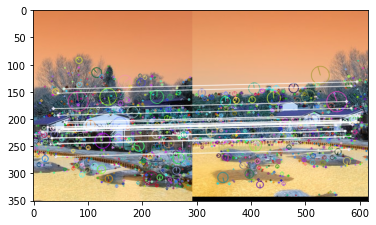

In [8]:
#feature matching

match = cv2.BFMatcher()
matches = match.knnMatch(descriptors_R,descriptors_L,k=2)

good = []
for m,n in matches:
    if m.distance < 0.03*n.distance:
        good.append(m)

draw_parameters = dict(matchColor=(255,255,255),
                       singlePointColor=None,
                       flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

img3 = cv2.drawMatches(imgR,keypoints_R,imgL,keypoints_L,good,None,**draw_parameters)

plt.imshow(img3)
plt.savefig('feature_detected_sift.png')
plt.show()




In [9]:
good

[<DMatch 000002565C74B2B0>,
 <DMatch 000002565C74B7F0>,
 <DMatch 000002565C74B830>,
 <DMatch 000002565C74BA30>,
 <DMatch 000002565C74BAF0>,
 <DMatch 000002565C74BB30>,
 <DMatch 000002565C74BB70>,
 <DMatch 000002565C74BBF0>,
 <DMatch 000002565C74BE30>,
 <DMatch 000002565C7511B0>,
 <DMatch 000002565C751270>,
 <DMatch 000002565C7512B0>,
 <DMatch 000002565C7512F0>,
 <DMatch 000002565C751330>,
 <DMatch 000002565C751370>,
 <DMatch 000002565C751570>,
 <DMatch 000002565C7517F0>,
 <DMatch 000002565C751830>,
 <DMatch 000002565C7519F0>,
 <DMatch 000002565C751B30>,
 <DMatch 000002565C751B70>,
 <DMatch 000002565C751C70>,
 <DMatch 000002565C751DB0>]

In [10]:
len(matches)

771

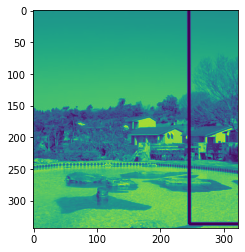

In [12]:

MIN_MATCH_COUNT = 10
if len(good) > MIN_MATCH_COUNT:
    src_pts = np.float32([ keypoints_R[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ keypoints_L[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    h,w = imgR2.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts, M)
    imgLR = cv2.polylines(imgL2,[np.int32(dst)],True,1,3, cv2.LINE_AA)
    
    plt.imshow(imgLR)
    plt.savefig('transform_sift.png')
    plt.show()
    
else:
    print("Not enought matches are found - %d/%d", (len(good)/MIN_MATCH_COUNT))

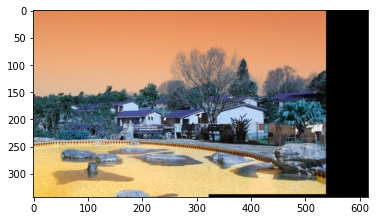

In [13]:
#combining images

warped_image = cv2.warpPerspective(imgR,M,(imgL.shape[1] + imgR.shape[1], imgL.shape[0]))
warped_image[0:imgL.shape[0], 0:imgL.shape[1]] = imgL
plt.imshow(warped_image)
plt.savefig('warped_image_sift.png')
plt.show()


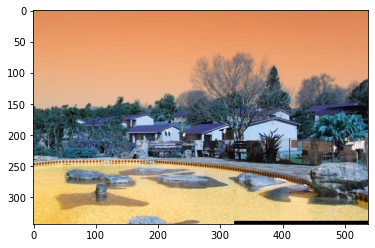

In [14]:

def trim(frame):
    #crop top
    if not np.sum(frame[0]):
        return trim(frame[1:])
    #crop bottom
    elif not np.sum(frame[-1]):
        return trim(frame[:-2])
    #crop left
    elif not np.sum(frame[:,0]):
        return trim(frame[:,1:]) 
    #crop right
    elif not np.sum(frame[:,-1]):
        return trim(frame[:,:-2])    
    return frame
        
plt.imshow(trim(warped_image))
plt.savefig('Stitched_sift.png')
plt.show()  
